## **Waste Classification with Data Augmentation** 

The project concerns waste classification to determine if it may be recycle or not. In this approach we will use a Convolutional Neural Network(CNN) model with data augumentation to achieve a better results. 
It is a binary classification problem and we will train the model in Keras as well.

**Data augmentation** is a technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy is different from the other ones in certain aspects depending on the augmentation techniques you apply like rotating, shifting, flipping, etc.
These techniques not only expand the size of our dataset but also include a level of variation in the dataset which allows our model to generalize better on unseen data. The model becomes also more robust when it is trained on new, slightly altered images.

**Data**

The dataset contains images divided into two classes: organic waste and recycle waste and it is split into train data (85%) and test data (15%). Training dataset contains 22564 images while test dataset 2513 images.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization


In [ ]:
cd '/content/drive/My Drive/Kaggle'

/content/drive/My Drive/Kaggle


### **Data preparation**

In [ ]:
train_dir = '/content/drive/My Drive/Kaggle/DATASET/TRAIN'
test_dir = '/content/drive/My Drive/Kaggle/DATASET/TEST'

**Data augumentation**

We use ImageDataGenerator to create a transformation that rescales the images and applied data augmentation as well. We generate augumentation only for train data while validation data are only rescaling ones. 

Keras **ImageDataGenerator** class provides a quick and easy way to augment of our images. It provides many of different augmentation techniques like standardization, shifts, rotation, flips, brightness change etc.

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255,
                                   validation_split=0.2)


val_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split=0.5)

Now we set our dataset into train, test and validation data. 

We use the flow_from_directory() method which allows to read the images directly from the directory and augment them while the neural network model is learning on the training data.

In [ ]:
Batch_size = 32

train_set = train_datagen.flow_from_directory(train_dir, class_mode='binary',
                                              batch_size = Batch_size,
                                              target_size=(64, 64))


val_set = val_datagen.flow_from_directory(test_dir, class_mode='binary',
                                          batch_size = Batch_size,
                                          target_size=(64, 64),
                                          subset= 'training')
   

test_set = val_datagen.flow_from_directory(test_dir, class_mode = 'binary',
                                           batch_size = Batch_size, 
                                           target_size=(64, 64),
                                           subset= 'validation')

Found 22564 images belonging to 2 classes.
Found 1257 images belonging to 2 classes.
Found 1256 images belonging to 2 classes.


In [ ]:
train_set.class_indices

{'O': 0, 'R': 1}

In [ ]:
train_set.image_shape

(64, 64, 3)

**Visualisation of augumentation**

Below we can see the results of the image augmentation:


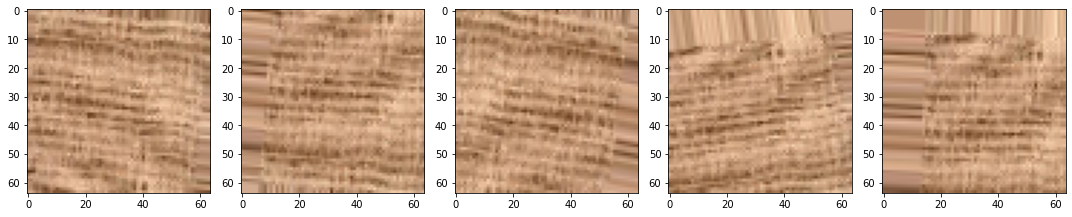

In [ ]:
def Images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_img = [train_set[0][0][0] for i in range(5)]
Images(augmented_img)

### **Creating the model**

We create the architecture for our Convolutional Neural Network (CNN) model. The architecture is simple. It consists of three Convolutional layers and two fully connected layers.

In [ ]:
model = Sequential([                
  Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)), 
  MaxPool2D((2,2)),
  Conv2D(32, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Conv2D(64, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(units=128, activation="relu"),
  Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

**Train the model**

We train the model for 5 epoch.


In [ ]:
history = model.fit(
    train_set,
    epochs = 5,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/5
22/22 [==============================] - 766s 36s/step - loss: 0.7338 - accuracy: 0.5485 - val_loss: 0.6406 - val_accuracy: 0.7232
Epoch 2/5
22/22 [==============================] - 276s 12s/step - loss: 0.5697 - accuracy: 0.7255 - val_loss: 0.4601 - val_accuracy: 0.8298
Epoch 3/5
22/22 [==============================] - 268s 12s/step - loss: 0.4213 - accuracy: 0.8153 - val_loss: 0.4550 - val_accuracy: 0.8258
Epoch 4/5
22/22 [==============================] - 258s 12s/step - loss: 0.4448 - accuracy: 0.8038 - val_loss: 0.5214 - val_accuracy: 0.7597
Epoch 5/5
22/22 [==============================] - 238s 11s/step - loss: 0.4175 - accuracy: 0.8346 - val_loss: 0.4187 - val_accuracy: 0.8369


The plots of loss and accuracy on the training and validation sets.

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

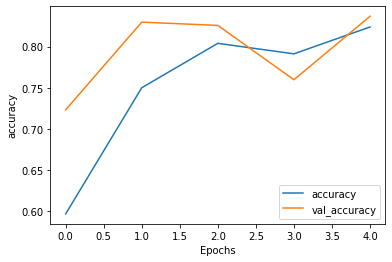

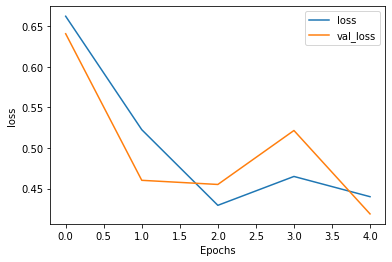

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8766


As you can notice here, the training and validation accuracy is increasing together and start decreasing after 2 epoch. The same is in the training and validation loss. We also see a little bit of overfitting.
Othervise on the test data we achieved 88% accuracy.

**Model 2**

In model two we add additional convolution layers and we reduce the complexity of architecture in fully connected layer.

In [ ]:
model2 = Sequential([
   Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(32, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(64, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Conv2D(128, (3,3), activation='relu', padding='same'),
   MaxPool2D((2,2)),
   Flatten(),
   Dense(64, activation="relu"),
   Dense(32, activation="relu"),
   Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In this case we train the model for 10 epoch.

In [ ]:
history_2 = model2.fit(
    train_set,
    epochs = 10,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/10
22/22 [==============================] - 717s 33s/step - loss: 0.6900 - accuracy: 0.5166 - val_loss: 0.5248 - val_accuracy: 0.7597
Epoch 2/10
22/22 [==============================] - 247s 11s/step - loss: 0.5341 - accuracy: 0.7570 - val_loss: 0.4861 - val_accuracy: 0.7733
Epoch 3/10
22/22 [==============================] - 240s 11s/step - loss: 0.4917 - accuracy: 0.7927 - val_loss: 0.4696 - val_accuracy: 0.7987
Epoch 4/10
22/22 [==============================] - 234s 11s/step - loss: 0.4694 - accuracy: 0.8236 - val_loss: 0.4748 - val_accuracy: 0.8218
Epoch 5/10
22/22 [==============================] - 225s 10s/step - loss: 0.4202 - accuracy: 0.8043 - val_loss: 0.4714 - val_accuracy: 0.8369
Epoch 6/10
22/22 [==============================] - 222s 10s/step - loss: 0.4921 - accuracy: 0.7958 - val_loss: 0.5053 - val_accuracy: 0.7868
Epoch 7/10
22/22 [==============================] - 207s 9s/step - loss: 0.4829 - accuracy: 0.7751 - val_loss: 0.5362 - val_accuracy: 0.7796
Epoch 8

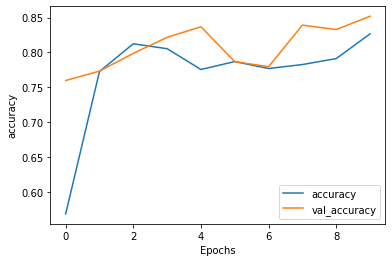

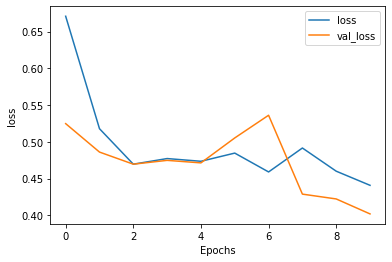

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [ ]:
loss, accuracy = model2.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Testing Accuracy:  0.8893


From the above plots one can see that the training and validation loss are both decreasing here with little divergence as compared to the outcome from the previous model. The case with the training and validation accuracy is also alike, they are increasing together. We see the overfitting is decreased. We also achieved a better accuracy on the test data i.e. 89%. 


Save the model:

In [ ]:
model2.save("waste_AG_model.h5")

### **Predictions**

We can see some predictions from our model and test own image.

In [ ]:
# add the image path 
test_image = image.load_img('waste1.jpg', target_size = (64, 64))

We visualize the image:

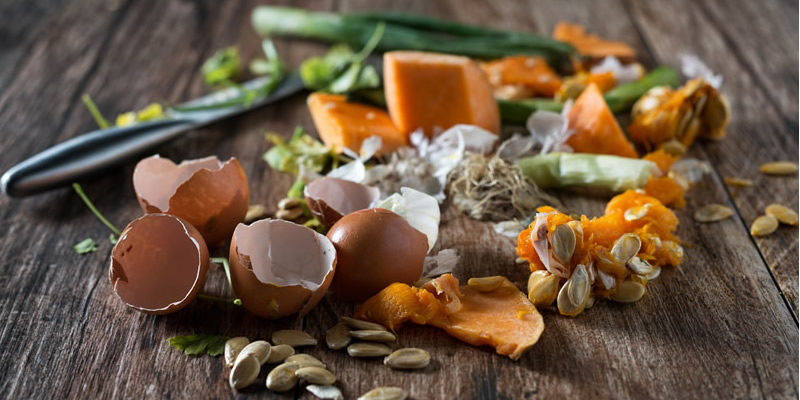

In [ ]:
Image.open('waste1.jpg')

Now, we converting image file into array and make prediction:

In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# prediction
result = model2.predict(test_image)

In [ ]:
# dataset class index
train_set.class_indices

{'O': 0, 'R': 1}

We can check the result and predicted class:

In [ ]:
print(result)

[[0.]]


In [ ]:
if result[0][0] == 1:
    prediction = 'Recyclable Waste'
else:
    prediction = 'Organic Waste'

In [ ]:
print(prediction)

Organic Waste


One can see that our model works well.